In [1]:
import pandas as pd
shap_values = pd.read_csv('full_curve_shap_values.csv', header=None)
shap_values.head()

,0,1,2,3,4
0,Group,Time,Feature,SHAP_Value,BaseValue
1,Group 508,9,Initial_Weight,-0.05540412664413452,-0.12660813331604004
2,Group 508,9,BET,4.103039085865021,-0.12660813331604004
3,Group 508,9,Time,-0.07694876194000244,-0.12660813331604004
4,Group 508,9,RH,0.6218820214271545,-0.12660813331604004


d:\anaconda\envs\rdkit2023\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<Figure size 1000x300 with 0 Axes>

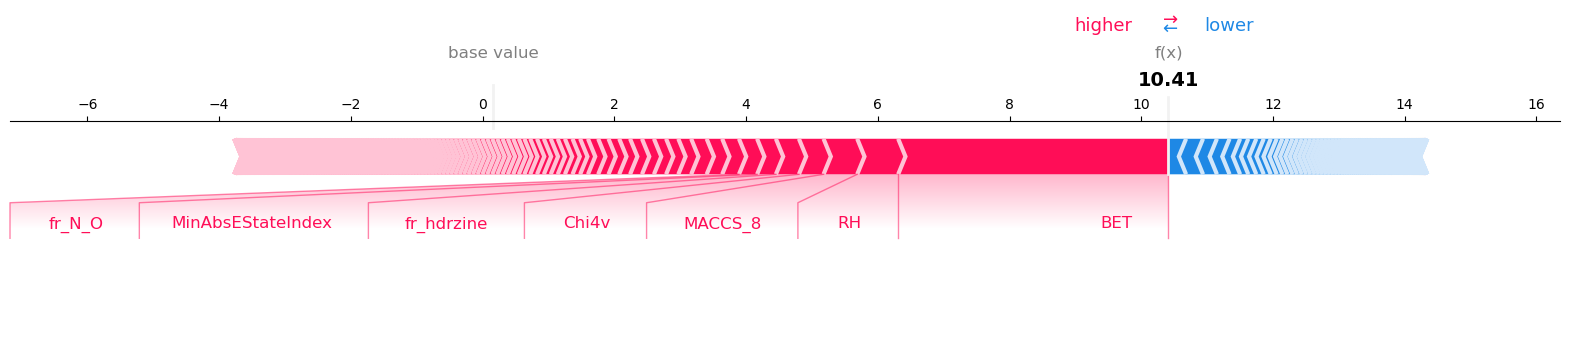

Force plot saved: Group 508, Time 9


<Figure size 1000x300 with 0 Axes>

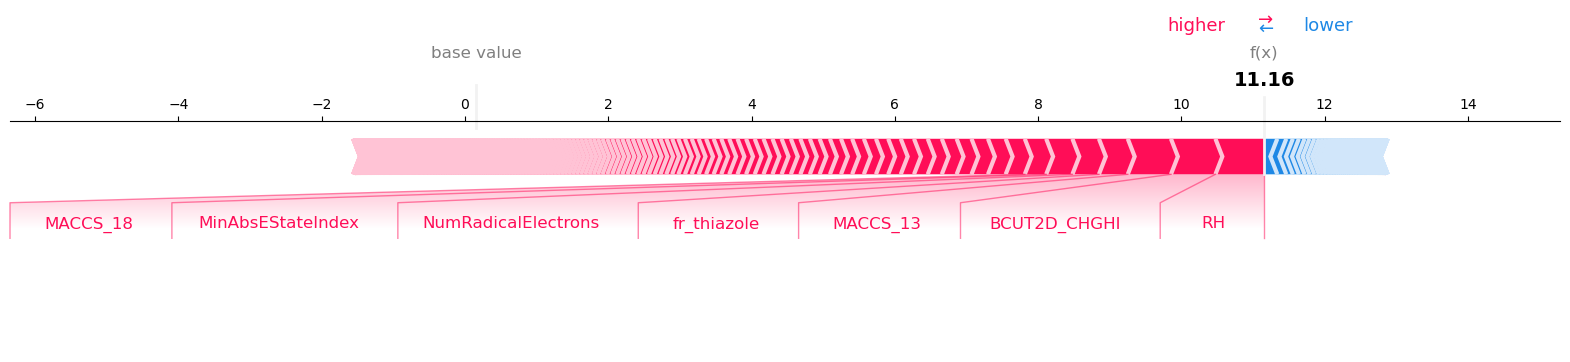

Force plot saved: Group 414, Time 9


<Figure size 1000x300 with 0 Axes>

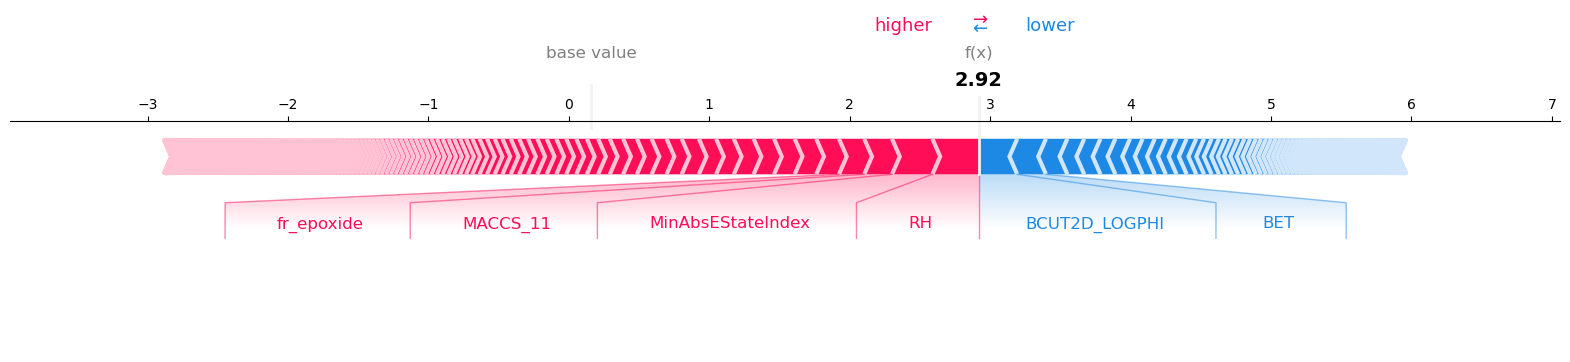

Force plot saved: Group 78, Time 9


<Figure size 1000x300 with 0 Axes>

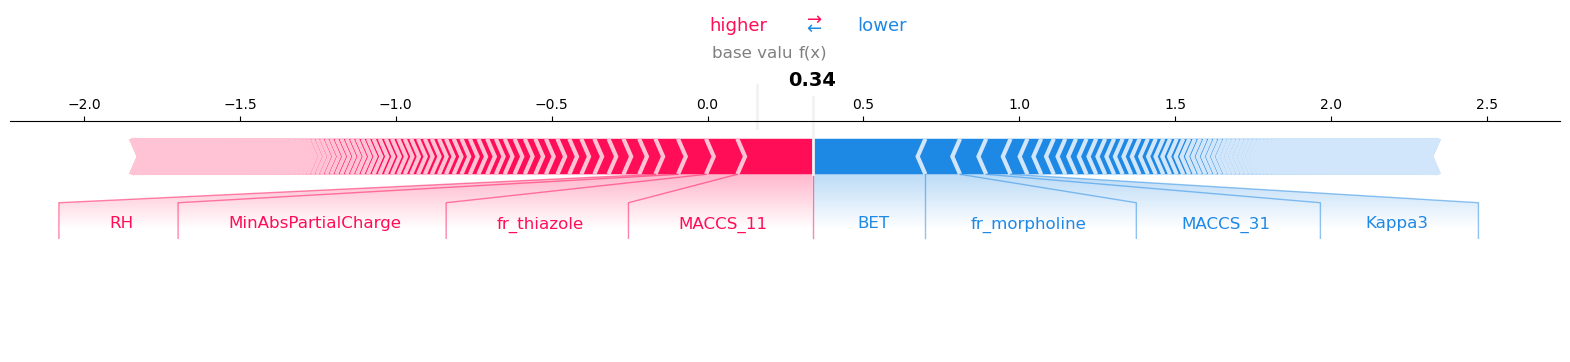

Force plot saved: Group 15, Time 9


In [2]:
import shap
import matplotlib.pyplot as plt
import os

CSV_PATH = "full_curve_shap_values.csv"
FIG_DIR   = "full_curve_local_interpret_plots/"
os.makedirs(FIG_DIR, exist_ok=True)

df = pd.read_csv(CSV_PATH)

labels = df["Group"].unique().tolist()
feature_names = df["Feature"].unique().tolist()
target_time = df["Time"].unique()[0]

custom_base_value = 0.16

#  Force Plot 
for label in labels:
    df_group = df[df["Group"] == label]

    plt.figure(figsize=(10, 3))
    shap.force_plot(
        base_value=custom_base_value,
        shap_values=df_group["SHAP_Value"].values,
        features=None, 
        feature_names=df_group["Feature"].values,
        matplotlib=True,
        show=False,
        contribution_threshold=0.02
    )
    plt.savefig(os.path.join(FIG_DIR, f"force_{label}_t{target_time}.png"),
                dpi=300, bbox_inches="tight")
    plt.show()
    plt.close()
    print(f"Force plot saved: {label}, Time {target_time}")

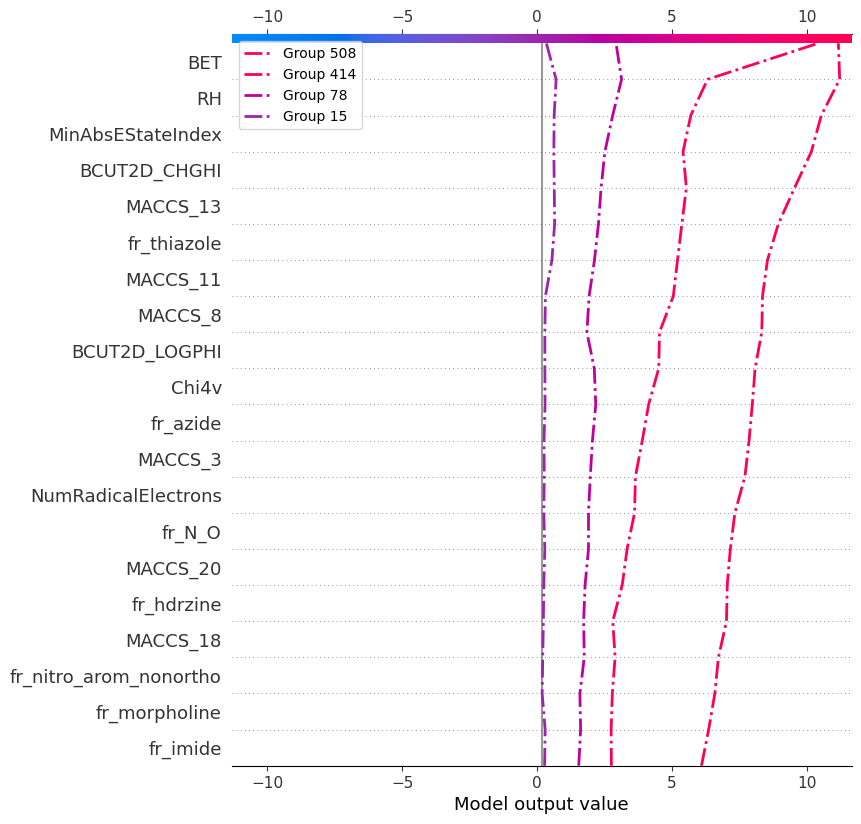

Decision plot saved


In [3]:
#  Decision Plot
shap_matrix = df.pivot(index="Group", columns="Feature", values="SHAP_Value").loc[labels, feature_names].values

plt.figure(figsize=(12, 6))
shap.decision_plot(
    base_value=custom_base_value,
    shap_values=shap_matrix,
    feature_names=feature_names,
    highlight=[i for i in range(len(labels))],
    legend_labels=labels,
    show=False,
)
plt.savefig(os.path.join(FIG_DIR, f"decision_groups_t{target_time}.png"),
            dpi=300, bbox_inches="tight")
plt.show()
plt.close()
print("Decision plot saved")